PROJECT TITLE : FASTAG FRAUD DETECTION

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd

PART 01 : EXPLORATORY DATA ANALYSIS

In [2]:
df = pd.read_csv(r"C:\Users\mrman\Downloads\CS_Project\FASTagFraudDetection.csv")
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
#Shape of data : no of rows and columns in dataset
df.shape

(5000, 13)

In [4]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
#To check whether any value is duplicated in dataset
df.duplicated().sum()

0

In [6]:
#To check if any column has null values or not
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [7]:
#Description for numerical values.
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [8]:
#Description for numerical values as well as categorical values.
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


OBSERVATIONS 01:

1. This concludes that the column Fastag ID has 549 null values and there are no empty values in the dataset.
2. There is no duplicate entries in the dataset.

In [9]:
#To check which columns are present in the dataset
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [10]:
#Unique entries in the dataset
print("Unique Vehicle Type: ", df['Vehicle_Type'].unique())
print("Unique TollBoothID : ", df['TollBoothID'].unique())
print("Unique Lane Type : ", df['Lane_Type'].unique())
print("Unique Vehicle Dimesnions : ", df['Vehicle_Dimensions'].unique())
print("Unique Fraud Indicator : ", df['Fraud_indicator'].unique())
print("Unique GeogrphicalLocation : ", df['Geographical_Location'].unique())

Unique Vehicle Type:  ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID :  ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane Type :  ['Express' 'Regular']
Unique Vehicle Dimesnions :  ['Large' 'Small' 'Medium']
Unique Fraud Indicator :  ['Fraud' 'Not Fraud']
Unique GeogrphicalLocation :  ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


PART 02 : DATA VISUALIZATION

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


Text(0.5, 1.0, 'Percentage of Fraud-indicator')

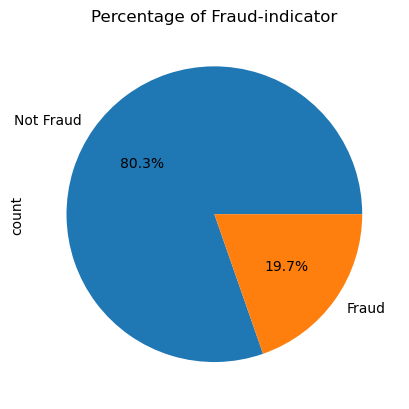

In [12]:
#Percentage of Fraud and Not-Fraud
print(df['Fraud_indicator'].value_counts())
df['Fraud_indicator'].value_counts().plot(kind="pie", autopct = "%1.1f%%")
plt.title("Percentage of Fraud-indicator")

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64


Text(0.5, 1.0, 'Vehicle Type')

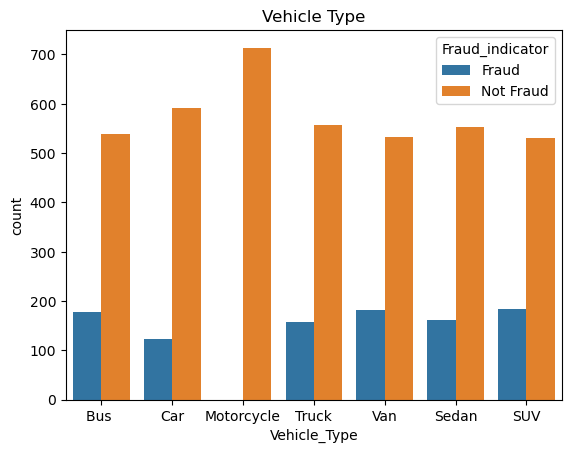

In [13]:
#Analysing Vehicle Type columns
print(df['Vehicle_Type'].value_counts())
sns.countplot(x='Vehicle_Type', 
              data = df, 
              hue ='Fraud_indicator').set_title('Vehicle Type')

Vehicle_Dimensions
Large     2144
Small     1428
Medium    1428
Name: count, dtype: int64


Text(0.5, 1.0, 'Vehicle Dimensions')

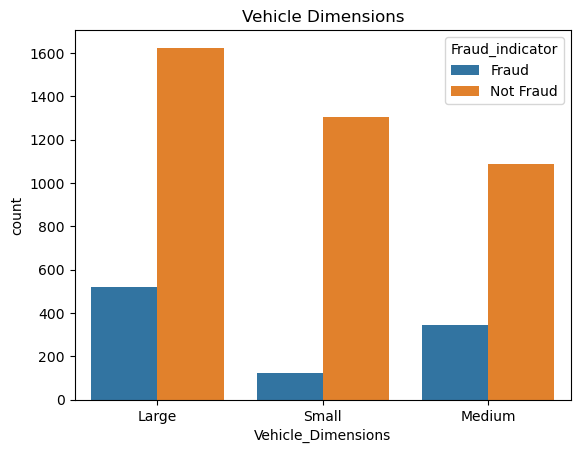

In [14]:
#Analysing Vehicle Dimensions columns
print(df['Vehicle_Dimensions'].value_counts())
sns.countplot(x='Vehicle_Dimensions', 
              data = df, 
              hue ='Fraud_indicator').set_title('Vehicle Dimensions')

TollBoothID
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: count, dtype: int64


Text(0.5, 1.0, 'TollBoothID')

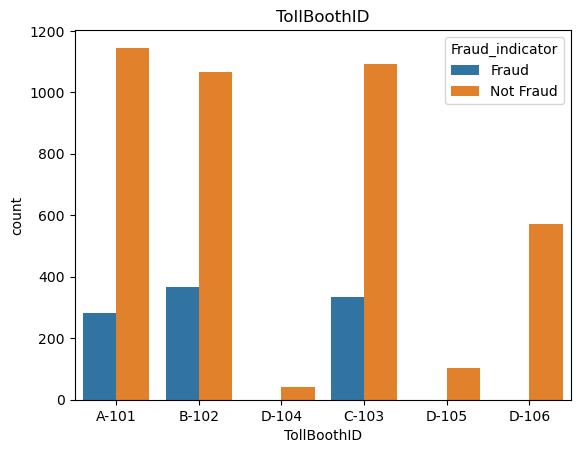

In [15]:
#Analysing TollBoothID columns
print(df['TollBoothID'].value_counts())
sns.countplot(x='TollBoothID', 
              data = df, 
              hue ='Fraud_indicator').set_title('TollBoothID')

Lane_Type
Regular    2858
Express    2142
Name: count, dtype: int64


Text(0.5, 1.0, 'Lane_Type')

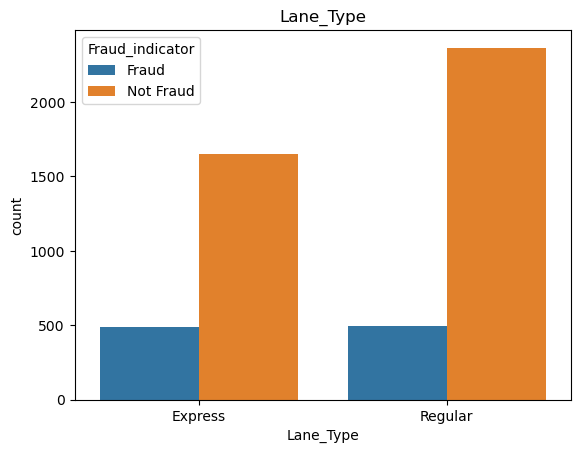

In [16]:
#Analysing Lane_Type columns
print(df['Lane_Type'].value_counts())
sns.countplot(x='Lane_Type', 
              data = df, 
              hue ='Fraud_indicator').set_title('Lane_Type')

OBSERVATIONS 02:
1. Motorcycles are clan - not involved in any fraud
2. Tollbooths 104, 105 and 106 have no fraud detected. But 101,102,103 have mix data
3. Express way has higher fraud percentage based on vehicles than regular ways
4. Very less small vehicles are involved in Faud

In [17]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

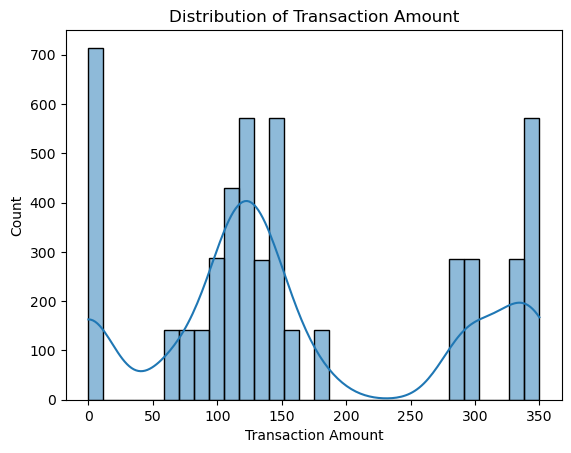

Transaction_Amount
0      714
120    430
100    288
350    286
330    286
290    286
110    286
340    286
300    286
140    284
130    284
115    144
150    144
145    144
90     142
60     142
70     142
180    142
160    142
125    142
Name: count, dtype: int64

In [18]:
sns.histplot(df['Transaction_Amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel('Transaction Amount')
plt.ylabel ("Count")
plt.show()
df['Transaction_Amount'].value_counts()


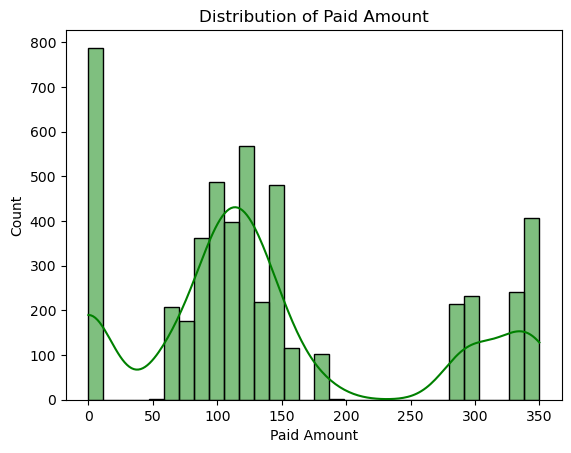

Amount_paid
0      788
100    487
120    432
90     361
110    258
330    241
300    233
140    226
130    219
290    215
350    212
60     207
340    194
70     160
115    140
150    138
125    136
145    117
160    115
180    103
80      16
190      1
50       1
Name: count, dtype: int64

In [19]:
sns.histplot(df['Amount_paid'], bins=30, kde=True, color ='green',edgecolor= 'black')
plt.title("Distribution of Paid Amount")
plt.xlabel('Paid Amount')
plt.ylabel ("Count")
plt.show()
df['Amount_paid'].value_counts()


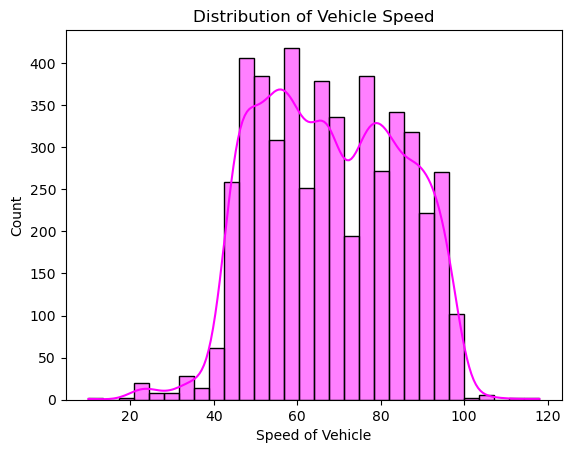

Vehicle_Speed
55     132
68     124
45     124
60     120
52     120
      ... 
29       2
28       2
27       2
26       2
102      2
Name: count, Length: 85, dtype: int64

In [20]:
sns.histplot(df['Vehicle_Speed'], bins=30, kde=True, color ='magenta',edgecolor= 'black')
plt.title("Distribution of Vehicle Speed")
plt.xlabel('Speed of Vehicle')
plt.ylabel ("Count")
plt.show()
df['Vehicle_Speed'].value_counts()

Relationship between tranasaction amount and paid amount

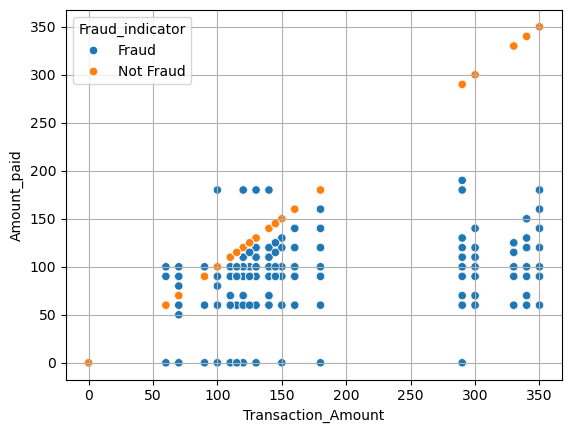

In [21]:
sns.scatterplot(x='Transaction_Amount',
                y = 'Amount_paid',
                hue='Fraud_indicator', data=df)
plt.grid()

Observation 3

When Transaction amount is not equal to amount Paid ==> Fraud

When Transcation amount is equal to amount Paid ==> Not Fraud

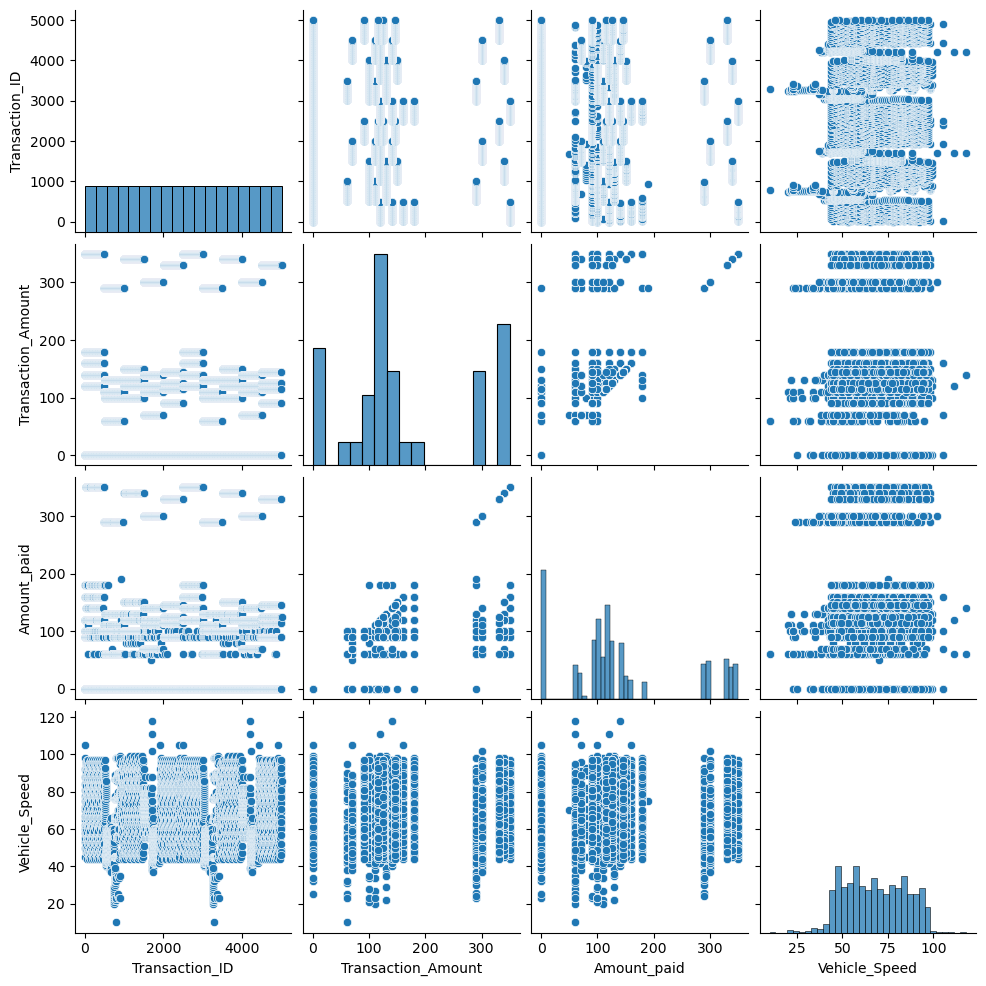

In [22]:
#pair plot
sns.pairplot(df)

3. Feature Extraction

In [23]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [24]:
df['state_code']= df['Vehicle_Plate_Number'].str[:2]
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,state_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,KA


In [25]:
#remove vehcile number plate feature
df = df.drop('Vehicle_Plate_Number',axis=1)

In [26]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,state_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA


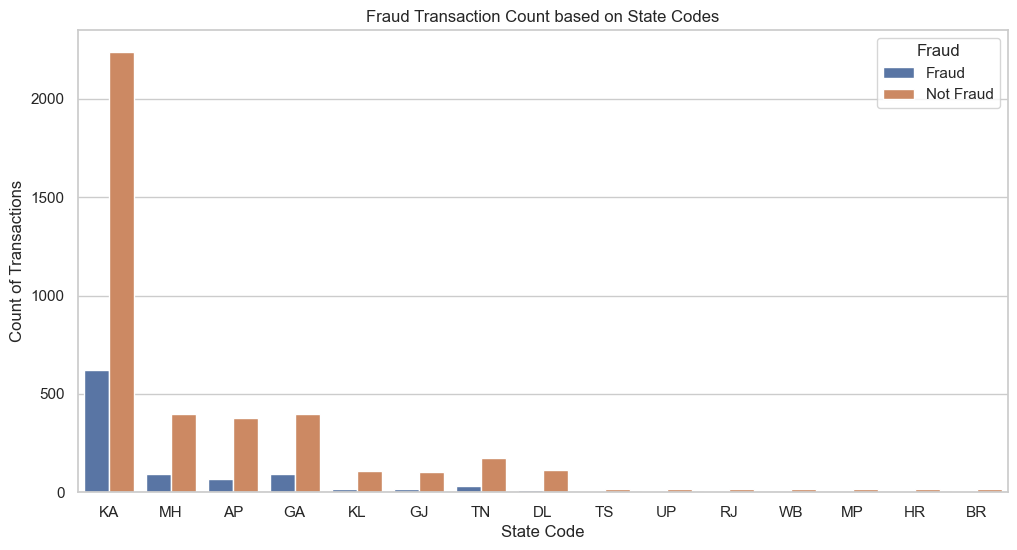

In [27]:
# visulaize fraud based on states
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='state_code',
              data = df,
              hue='Fraud_indicator')
plt.title('Fraud Transaction Count based on State Codes')
plt.xlabel('State Code')
plt.ylabel('Count of Transactions')
plt.legend(title='Fraud')
plt.show()

In [28]:
df['state_code'].value_counts()

state_code
KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: count, dtype: int64

In [29]:
df.loc[df['Fraud_indicator']=='Fraud', 'state_code'].value_counts()

state_code
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64

Observation 4

Highest Fraud count is in Karnataka(KA)

In [30]:
# analysie Timestamp to get the fraud /notfraud based on days
df['Timestamp']

0        1/6/2023 11:20
1        1/7/2023 14:55
2        1/8/2023 18:25
3         1/9/2023 2:05
4        1/10/2023 6:35
             ...       
4995     1/1/2023 22:18
4996    1/17/2023 13:43
4997      2/5/2023 5:08
4998    2/20/2023 20:34
4999     3/10/2023 0:59
Name: Timestamp, Length: 5000, dtype: object

In [31]:
#convert timestamp into dataframe
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [32]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [33]:
#drop time stamp feature
df = df.drop('Timestamp', axis=1)

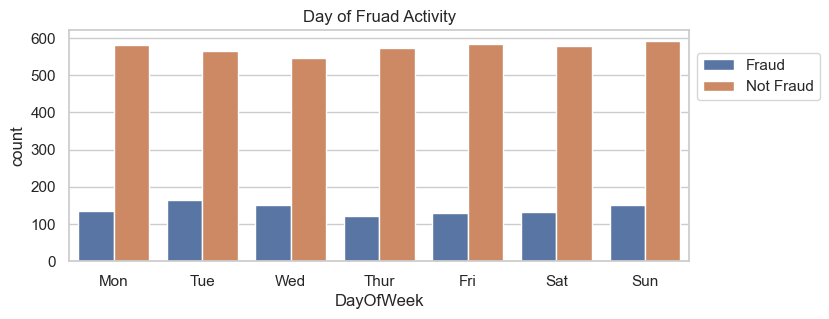

In [34]:
#visualise based on days
plt.figure(figsize=(8,3))
sns.countplot(data = df,
              x='DayOfWeek',
              hue='Fraud_indicator')
plt.title('Day of Fruad Activity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.8))
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thur','Fri','Sat','Sun'])
plt.show()

Correlation Matrix

In [35]:
numericalDf = df.select_dtypes('number')  #only numerical data

In [36]:
corr_matrix = numericalDf.corr()
corr_matrix

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,DayOfWeek,Month
Transaction_ID,1.000000,-0.023515,0.044433,0.014378,-0.023208,0.002446,0.260075
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229,-0.036980,-0.001813,-0.019824
Amount_paid,0.044433,0.870078,1.000000,0.039027,-0.026358,-0.002960,0.018105
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000,-0.002259,-0.017608,0.015349
Hour,-0.023208,-0.036980,-0.026358,-0.002259,1.000000,-0.010292,0.001041
DayOfWeek,0.002446,-0.001813,-0.002960,-0.017608,-0.010292,1.000000,0.002552
Month,0.260075,-0.019824,0.018105,0.015349,0.001041,0.002552,1.000000


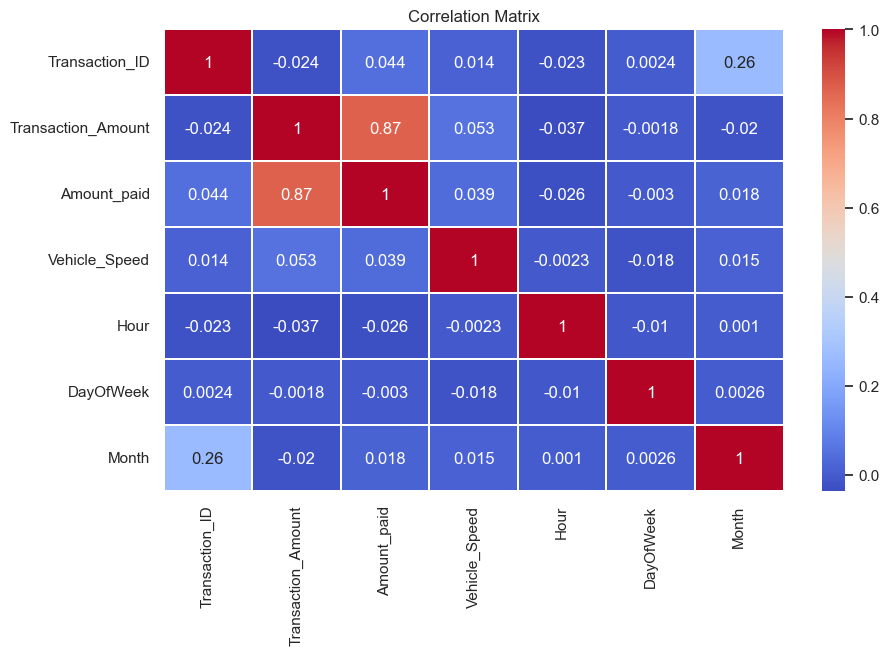

In [37]:
#plot corrrelation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, 
            cmap='coolwarm', annot=True, linewidths=.2)
plt.title("Correlation Matrix")
plt.show()

In [38]:
df.columns

Index(['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator',
       'state_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [39]:
# remove unecessary columns
# df = df.drop(['Transaction_ID','FastagID', 'Geographical_Location'], axis =1)


df.drop(['Transaction_ID','FastagID', 'Geographical_Location'], axis =1, inplace =True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   TollBoothID         5000 non-null   object
 2   Lane_Type           5000 non-null   object
 3   Vehicle_Dimensions  5000 non-null   object
 4   Transaction_Amount  5000 non-null   int64 
 5   Amount_paid         5000 non-null   int64 
 6   Vehicle_Speed       5000 non-null   int64 
 7   Fraud_indicator     5000 non-null   object
 8   state_code          5000 non-null   object
 9   Hour                5000 non-null   int32 
 10  DayOfWeek           5000 non-null   int32 
 11  Month               5000 non-null   int32 
dtypes: int32(3), int64(3), object(6)
memory usage: 410.3+ KB


In [41]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [42]:
df.columns

Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Fraud_indicator',
       'state_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [43]:
objectColumns = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions','TollBoothID','state_code', 'Fraud_indicator' ] #list of object columns
label_encoder = {}
for column in objectColumns:
    le=LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [44]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code,Hour,DayOfWeek,Month
0,0,0,0,0,350,120,65,0,6,11,4,1
1,1,1,1,2,120,100,78,0,6,14,5,1
2,2,3,1,2,0,0,53,1,6,18,6,1
3,5,2,1,0,350,120,92,0,6,2,0,1
4,6,1,0,1,140,100,60,0,6,6,1,1


In [45]:
label_encoder['Fraud_indicator'].classes_

array(['Fraud', 'Not Fraud'], dtype=object)

4. Model Training

In [46]:
X= df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']

In [47]:
# SPlit the x and y in train and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3500, 11)
X_test:  (1500, 11)
y_train:  (3500,)
y_test:  (1500,)


Logistic Regression MODEL

In [49]:
# import the model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model

LogisticRegression()

In [50]:
# fit the model
lr_model.fit(X_train, y_train)

c:\Users\mrman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#predict
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

5. Model Evaluation

Model 01 : Logistic Regression

In [52]:
# import libraries for matrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [53]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision=precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


print("LR model results: \n")
print("Accuracy: ", accuracy)
print("\nConfusion Matrix\n", conf_matrix)
print("\nPrecision : ", precision)
print("\nRECALL: ", recall)
print("\nF1 Score: ", f1)

LR model results: 

Accuracy:  0.9826666666666667

Confusion Matrix
 [[ 301   26]
 [   0 1173]]

Precision :  0.9783152627189324

RECALL:  1.0

F1 Score:  0.9890387858347386


In [54]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       327
           1       0.98      1.00      0.99      1173

    accuracy                           0.98      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [55]:
#function to evaluate model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    precision=precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    
   
    print("Accuracy: ", accuracy)
    print("\nConfusion Matrix\n", conf_matrix)
    print("\nPrecision : ", precision)
    print("\nRECALL: ", recall)
    print("\nF1 Score: ", f1)


In [56]:
# testing all models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

Model 02: Decision Tree

In [57]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_tree_pred = tree_model.predict(X_test)
y_tree_pred

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
#Accuacy of Decision Tree
print("Decision Tree Model evaluation: \n")
evaluate_model(y_test, y_tree_pred)

Decision Tree Model evaluation: 

Accuracy:  0.9986666666666667

Confusion Matrix
 [[ 325    2]
 [   0 1173]]

Precision :  0.9982978723404256

RECALL:  1.0

F1 Score:  0.9991482112436116


Model 03 : Random Forest

In [59]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

#accuracy 
print("RANDOM FOREST MODEL EVALUATION: ")
evaluate_model(y_test, rf_y_pred)

RANDOM FOREST MODEL EVALUATION: 
Accuracy:  0.9826666666666667

Confusion Matrix
 [[ 301   26]
 [   0 1173]]

Precision :  0.9783152627189324

RECALL:  1.0

F1 Score:  0.9890387858347386


Model 04 : Support Vecotr Machine

In [60]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [61]:
svc_y_pred = svc_model.predict(X_test)

#accuracry 
print("SUPPORT VECTOR CLASSIFIER MODEL EVALUATION: ")
evaluate_model(y_test, svc_y_pred)

SUPPORT VECTOR CLASSIFIER MODEL EVALUATION: 
Accuracy:  0.9793333333333333

Confusion Matrix
 [[ 296   31]
 [   0 1173]]

Precision :  0.9742524916943521

RECALL:  1.0

F1 Score:  0.9869583508624317


Model 05 : KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors = 3)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
knn_y_pred = knnModel.predict(X_test)
#accuracy
print("KNN Classifier MODEL EVALUATION: ")
evaluate_model(y_test, knn_y_pred)

KNN Classifier MODEL EVALUATION: 
Accuracy:  0.9873333333333333

Confusion Matrix
 [[ 308   19]
 [   0 1173]]

Precision :  0.9840604026845637

RECALL:  1.0

F1 Score:  0.9919661733615222


Text(0.5, 1.0, 'COmparison of Accuracy Scores of different models')

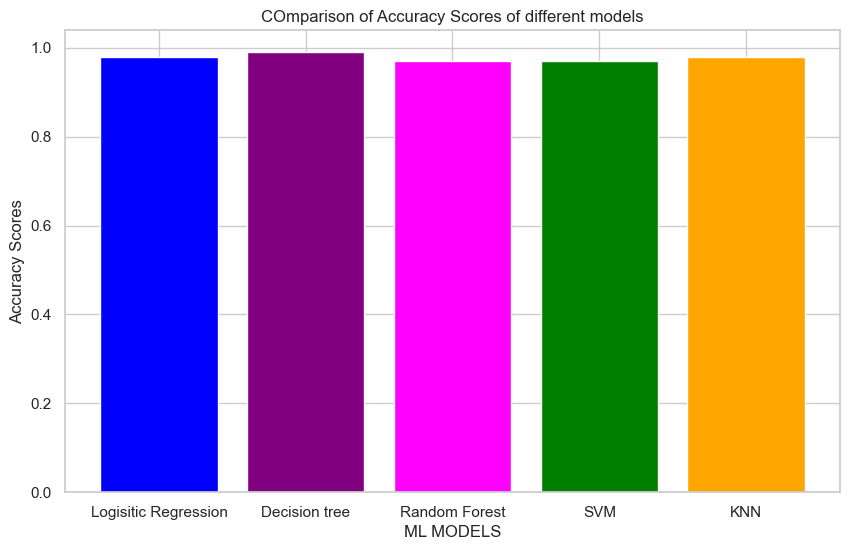

In [64]:
# lets visualsie
models = ['Logisitic Regression', 'Decision tree', 'Random Forest', 'SVM', 'KNN']
accuarcy_scores= [ 0.98,0.99,0.97, 0.97, 0.98]
colors = ['blue', 'purple', 'magenta', 'green','orange']
plt.figure(figsize=(10,6))

plt.bar(models, accuarcy_scores, color = colors)
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy Scores")
plt.title("COmparison of Accuracy Scores of different models")

Conclusion


Decision Tree
- highest accuracy (99%)
- overall top performing model